## SALARY PREDICTION BASED ON WORK EXPERIENCE


In [1]:

import numpy as np # linear algebra
print('Numpy version : {}'.format(np.__version__))

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print('Pandas version : {}'.format(pd.__version__))

import seaborn as sb
print('Seaborn version : {}'.format(sb.__version__))

import matplotlib
import matplotlib.pyplot as plt
print('Matplotlib version : {}'.format(matplotlib.__version__))

import warnings 
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Numpy version : 1.23.5
Pandas version : 1.5.3
Seaborn version : 0.12.2
Matplotlib version : 3.7.1


##### Load Dataset
Ambil dan lihat konten dari 10 data pertama

In [2]:
# Mengambil dan melihat isi 10 data pertama  
data = pd.read_csv('Salary_Data.csv')
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#### Data Exploration

##### Data Structure

*Berdasarkan output di bawah ini, dataset telah menampilkan informasi struktural yang berupa nama fitur, berapa jumlah data yang non-null, serta tipe data yang digunakan. Terlihat bahwa terdapat 2 fitur dalam dataset, dimana untuk setiap fitur yang tiak memiliki data not-null yang artinya dataset ini tidak mengandung data null. Dapat terlihat pula bahwa dataset ini menggunakna tipe data float pada kedua fiturnya*

In [11]:
# Melihat informasi struktural dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


##### Data Dimension
Berdasarkan output di bawah ini, dimensi data dalam dataset adalah 30 baris dan 2 kolom.

In [12]:
# Melihat dimensi dataset (30 baris dan 2 kolom).
data.shape

(30, 2)

##### Deskripsi Data
Keluaran di bawah ini akan menampilkan berbagai informasi statistik untuk setiap kolom

In [13]:
# Menampilkan informasi statistik untuk setiap kolomnya
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

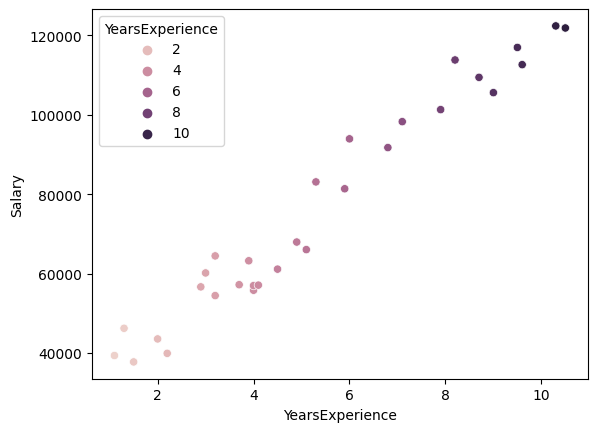

In [14]:
# Melihat penyebaran data
sb.scatterplot(x='YearsExperience', y='Salary',hue='YearsExperience', data=data)

#### Data Preparation

##### Checking for Null Data 
*Berdasarkan output di bawah akan ditampilkan jumlah data null pada setiap kolom atau fitur dalam dataset. Output menunjukkan bahwa setiap kolom sudah tidak mengandung data null.*

In [15]:
# Memeriksa nilai null dalam dataset
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

##### Checking for Outliers
*Outliers perlu dicari dan dihapus karena dapat mengakibatkan kesalahan dalam pengukuran, kesalahan dalam entri ataupun kesalahan dalam pemrosesan data dikarenakan pengambilan sampel yang buruk.*

*Kode dibawah ini digunakan untuk mendeteksi outliers dengan menggunakan Inter-Quartile Range (IQR). IQR akan menunjukkan median dari dataset, kemudian IQR akan menentukan data mana yang telah melebihi batas normal atas dan bawah dari pada dataset. Kemudian IQR akan mendefinisikan fitur yang terdapat nilai outlier sebagai yes maupun no apabila tidak terdaapat outlier.*

In [16]:
# Memeriksa data outlier
for i in data:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if data[(data[i] > up) | (data[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

YearsExperience no
Salary no


#### Data Modelling
*Memodelkan data berarti mengolah dan menganalisis data dengan menggunakan suatu model algoritma baik secara manual maupun menggunakan model yang telah ada sebelumnya. Dalam fase pemodelan, data akan diuji menggunakan beberapa model untuk menentukan model terbaik.*

##### Feature Selection
Selecting features in dataset, which is YearsExperience as X and Salary as Y

Memilih fitur dalam dataset, yaitu YearsExperience sebagai X dan Gaji sebagai Y

In [17]:
X = data['YearsExperience']
Y = data['Salary']

##### Data Reshape
Mengubah bentuk data (reshape) dengan menghapus indeks agar pemodelan lebih mudah

In [18]:
# Mengubah bentuk data (reshape) dengan menghilangkan index untuk mempermudah modeling
print("Sebelum reshape:\n",X, "\n")
X = X.values.reshape(-1,1)
print("Sesudah reshape:\n",X)

Sebelum reshape:
 0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64 

Sesudah reshape:
 [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


##### Data Split
*Data dibagi menjadi pelatihan dan pengujian untuk mengevaluasi kinerja algoritma. Data tersebut akan dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian. Sehingga data training menjadi 48 dan data testing menjadi 12.*

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
print(X.shape, X_train.shape, X_test.shape)

(30, 1) (24, 1) (6, 1)


##### Building models
*Modelling dilakukan dengan menggunakan 4 algoritma yaitu Linear Regression, K-Nearest Neighbors Regressor, Random Forset Regressor, dan Decision Tree Regressor. Nantinya akan dilakukan evaluasi untuk menentukan algoritma terbaik dari keempat algpritma tersebut untuk dipilih dan ditammpilkan visualisasinya.*

###### **Linear Regression**
*Linear Regression adalah algoritma untuk pemodelan regresi yang digunakan untuk memprediksi nilai variabel berdasarkan nilai variabel lain.*

In [20]:
from sklearn.linear_model import LinearRegression

# Membangun Model
LR = LinearRegression()

# Melakukan Training
LR.fit(X_train,Y_train)

Y_predLR = LR.predict(X_test)

###### **KNN Regressor**
KNN Regressor adalah algoritma untuk membangun model regresi yang menggunakan nilai rata-rata atau median dari k tetangga untuk memprediksi elemen target.

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# Membangun Model
KNR = KNeighborsRegressor(n_neighbors=3)

# Melakukan Training
KNR.fit(X_train,Y_train)

Y_predKNR = KNR.predict(X_test)

###### **Random Forest Regressor**
*Random Forest Regressor merupakan algoritma untuk pemodelan regresi yang digunakan untuk memprediksi nilai berkelanjutan*

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Membangun Model
RFR = RandomForestRegressor(random_state = 0)

# Melakukan Training
RFR.fit(X_train,Y_train)

Y_predRFR = RFR.predict(X_test)

###### **Decision Tree Regressor**
*Decision Tree Regressor merupakan algoritma untuk membangun model regresi yang mengamati fitur suatu objek dan melatih model dalam struktur pohon.*

In [23]:
from sklearn.tree import DecisionTreeRegressor

# Membangun Model
DTR = DecisionTreeRegressor(random_state = 0)

# Melakukan Training
DTR.fit(X_train,Y_train)

Y_predDTR = DTR.predict(X_test)

#### Evaluation
*Evaluasi adalah proses pencatatan hasil pembelajaran menggunakan metrik evaluasi yang berbeda untuk memahami kinerja model. Evaluasi model juga berperan dalam pemantauan dan pemilihan model terbaik dengan melihat score dari data test dan data train masing-masing algoritma. Berdasarkan informasi dibawah ini, diperoleh bahwa model terbaik adalah Linear Regression.*

In [24]:
from sklearn.metrics import r2_score

# Melihat akurasi testing dan training dari model Linear Regression
print("Linear Regression")
LR_Train = LR.score(X_train,Y_train)*100
LR_Test = LR.score(X_test, Y_test)*100 
print("Train : ",LR_Train)
print("Test  : ",LR_Test, "\n")

# Melihat akurasi testing dan training dari model KNN Regressor
print("KNN Regressor")
KNR_Train = KNR.score(X_train,Y_train)*100
KNR_Test = KNR.score(X_test, Y_test)*100 
print("Train : ",KNR_Train)
print("Test  : ",KNR_Test, "\n")

# Melihat akurasi testing dan training dari model Decision Tree Regressor
print("Decision Tree Regressor")
DTR_Train = DTR.score(X_train,Y_train)*100
DTR_Test = DTR.score(X_test, Y_test)*100 
print("Train : ",DTR_Train)
print("Test  : ",DTR_Test, "\n")

# Melihat akurasi testing dan training dari model Random Forest Regressor
print("Random Forest Regressor")
RFR_Train = RFR.score(X_train,Y_train)*100
RFR_Test = RFR.score(X_test, Y_test)*100 
print("Train : ",RFR_Train)
print("Test  : ",RFR_Test, "\n")

Linear Regression
Train :  94.11949620562126
Test  :  98.8169515729126 

KNN Regressor
Train :  96.1998291391859
Test  :  97.35051713340684 

Decision Tree Regressor
Train :  99.65651820805788
Test  :  97.64754205531827 

Random Forest Regressor
Train :  98.65291759929377
Test  :  97.9497245436854 




*Evaluasi dibawah dilakukan menggunakan mean absolute error, mean squared error, dan r2-score. Semakin kecil nilai mean absolute error dan mean squared error, namun semakin besar nilai r2-score maka algoritma tersebut lebih baik.*

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

results= pd.DataFrame(columns=['Mean Absolute Error','Mean Squared Error','R2-score'])
results.loc['LinearRegression']=[mean_absolute_error(Y_test,Y_predLR),mean_squared_error(Y_test,Y_predLR),r2_score(Y_test,Y_predLR)*100]
results.loc['K-nearest Neighbors']=[mean_absolute_error(Y_test,Y_predKNR),mean_squared_error(Y_test,Y_predKNR),r2_score(Y_test,Y_predKNR)*100]
results.loc['DecisionTree']=[mean_absolute_error(Y_test,Y_predDTR),mean_squared_error(Y_test,Y_predDTR),r2_score(Y_test,Y_predDTR)*100]
results.loc['Random Forest']=[mean_absolute_error(Y_test,Y_predRFR),mean_squared_error(Y_test,Y_predRFR),r2_score(Y_test,Y_predRFR)*100]

# Melakukan pengurutan berdasarkan R2-score
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens', subset=['R2-score'])

,Mean Absolute Error,Mean Squared Error,R2-score
LinearRegression,2446.172369,12823412.298127,98.816952
Random Forest,4100.858611,22223542.924426,97.949725
DecisionTree,4120.666667,25498988.416667,97.647542
K-nearest Neighbors,4577.555556,28718529.518519,97.350517


##### K-Fold Cross Validation
Validasi silang adalah prosedur resampling yang digunakan untuk mengevaluasi model pembelajaran mesin pada sampel data terbatas.

Prosedur memiliki parameter tunggal yang disebut k yang akan dipecah menjadi sampel data yang diberikan. Dengan demikian, prosedur ini sering disebut k-fold cross-validation.

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Menilai kinerja metode Linier Regression dengan membagi sampel data sebanyak 10 lipatan secara acak 
cv_LR = KFold(n_splits=10, random_state=0, shuffle=True)
score = cross_val_score(LR,X,Y,cv=cv_LR)
print('The Average Cross Validation Score is',np.round(np.mean(score)*100,3))

The Average Cross Validation Score is 92.755


#### Prediction
*Prediksi nilai salary berdasarkan years experience akan dilakukan menggunakan algoritma Linear Regression. Percobaan prediksi akan dilakukan sebanyak 3 kali dengan nilai years experience 3,5, dan 10.*

In [27]:
# Mencoba prediksi untuk 3, 5, dan 10 tahun kedepan
print(LR.predict([[3]]))
print(LR.predict([[5]]))
print(LR.predict([[10]]))

# Berapakah nilai salary yang akan keluar?
# Nilainya adalah 54k, 73k, dan 119k

[54717.82453082]
[73342.97478427]
[119905.85041792]


#### Prediction Visualization
*Melakukan representasi informasi dan data dalam bentuk gambar grafik distplot dari hasil yang diperkirakan algoritma dengan data aslinya. Visualisasi dibawah menggunakan bantuan dari library seaborn.*

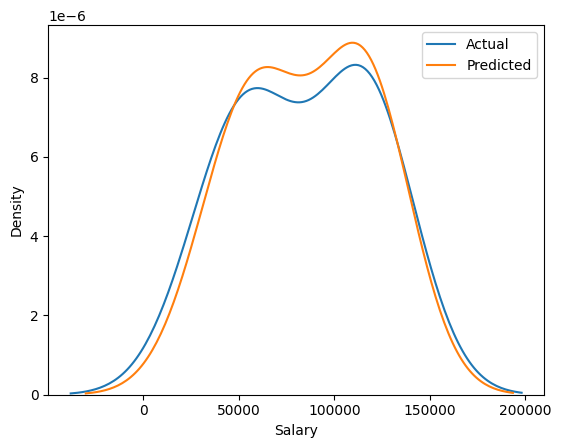

In [28]:
sb.distplot(Y_test,hist=False,label='Actual')
sb.distplot(Y_predLR,hist=False,label='Predicted')
plt.legend()

In [31]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [46]:
import pickle

filename = 'Salary.sav'
pickle.dump(lr,open(filename,'wb'))